In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv("../data/dataset_attributes.csv")

In [4]:
dataset = dataset.apply(pd.to_numeric, errors='ignore')

In [5]:
y = np.empty(len(dataset['Overall']), dtype='object')

In [11]:
x = dataset.drop(['ID','ID.1','Name','Overall'], axis = 1)
y[dataset['Overall']> 85] = '0'
y[dataset['Overall']<=85] = '1'
y[dataset['Overall']<=65] = '2'

In [12]:
x = x.apply(pd.to_numeric, errors='ignore')
x = (x - x.mean()) / (x.max() - x.min())

In [14]:
x.head()

,Age,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0.220944,0.476198,0.288522,0.085449,0.314080,-0.008964,0.402258,0.408611,0.410477,0.393036,...,0.502214,0.302194,0.422351,-0.259288,0.309153,0.347805,-0.186481,0.189180,0.381794,0.515780
1,0.156428,0.455365,0.323816,-0.091022,0.326275,0.367507,0.425247,0.419600,0.317454,0.486060,...,0.487508,0.363170,0.323449,-0.224805,0.262094,0.118889,-0.220571,-0.080051,0.441318,0.481297
2,-0.004862,0.476198,0.347345,0.003096,0.399446,0.214566,0.425247,0.375644,0.294198,0.393036,...,0.384567,0.277804,0.268504,-0.144345,0.297389,0.179130,-0.266026,-0.156974,0.322270,0.458308
3,0.156428,0.434532,0.276757,0.261919,0.277495,-0.044258,0.379270,0.276743,0.317454,0.451176,...,0.458096,0.302194,0.345427,-0.086874,0.144447,0.311660,-0.027390,0.189180,0.369890,0.515780
4,0.188686,0.434532,-0.076184,-0.314551,-0.137139,-0.338376,-0.114983,0.133886,-0.403476,-0.386033,...,0.340449,-0.039269,-0.335891,-0.397219,-0.043788,-0.230508,-0.425117,0.227641,0.203223,-0.369278


In [15]:
pca = PCA(n_components=2)
lda = LDA(n_components=2)

In [44]:
X_r = pca.fit(x).transform(x)
compo = pca.components_
compo =(compo - compo.mean()) / (compo.max() - compo.min())
#compo = compo * 10

In [51]:
X_r2 = lda.fit(x,y).transform(x)
compo2 = lda.coef_
compo2 =(compo2 - compo2.mean()) / (compo2.max() - compo2.min())
#compo2 = compo2 * 10

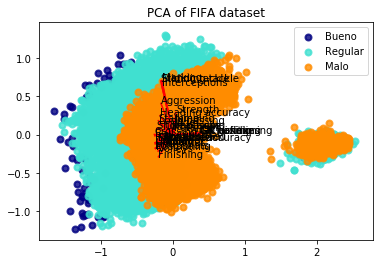

In [52]:
colors = ['navy', 'turquoise', 'darkorange']
target_names = ['Bueno','Regular','Malo']
lw = 2
plt.figure()
for color, i, target_name in zip(colors, ['0', '1', '2'], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

for a,b,component in zip(compo[0,:],compo[1,:],x.columns):
#for a,b in zip(compo[0,:],compo[1,:]):    
    plt.plot([0,a],[0,b],label=component, color='red')
    plt.text(a, b, component)

plt.title('PCA of FIFA dataset')

plt.show()

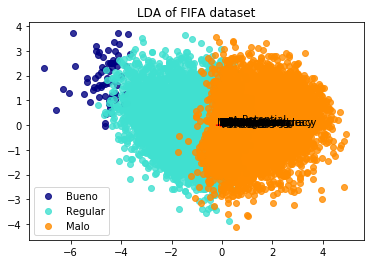

In [53]:
plt.figure()
for color, i, target_name in zip(colors, ['0', '1', '2'], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

for a,b,component in zip(compo2[0,:],compo2[1,:],x.columns):
    plt.plot([0,a],[0,b],label = component, color = 'red')
    plt.text(a, b, component)

plt.title('LDA of FIFA dataset')

plt.show()

In [200]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.56166117  0.19037447]


In [203]:
print('explained variance ratio (first two components): %s'
      % str(pca.components_))

explained variance ratio (first two components): [[ -6.22246711e-03  -2.25394387e-02  -1.36707660e-01  -1.53208403e-01
   -1.35962487e-01  -1.14694411e-01  -2.12552418e-01  -1.32931313e-01
   -2.13428406e-01  -2.06540583e-01  -2.30866149e-01  -1.94279813e-01
   -1.85260187e-01   2.07411450e-01   1.97949535e-01   1.92465265e-01
    1.98728154e-01   2.10646076e-01  -1.72141679e-01  -1.50370651e-01
   -3.80737560e-02  -1.68505171e-01  -2.14130950e-01  -1.48589895e-01
   -1.63246810e-01  -2.20490360e-01  -4.79154212e-02  -1.81766523e-01
   -1.95902582e-01  -1.49730006e-01  -1.33841942e-01  -1.72268423e-01
   -1.59879053e-01  -2.19014067e-02  -1.30308003e-01  -1.84627603e-01]
 [  9.17455707e-03  -6.89270412e-03  -9.45170831e-02   2.03121665e-01
   -1.19640681e-01  -8.65822904e-02  -5.85966333e-02   6.08138470e-04
   -4.57676944e-02  -1.25430128e-01  -1.25989625e-01  -2.53343075e-01
   -9.59463200e-02  -4.81103463e-02  -4.64670722e-02  -4.57042378e-02
   -4.56472226e-02  -4.90046004e-02   1.